In [ ]:
#importing data and needed libraries
import pandas as pd
import statistics as st
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'/content/sales_data_with_discounts.csv')
df


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
print(df.dtypes)

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object


In [ ]:
df.isnull().sum()

,0
Date,0
Day,0
SKU,0
City,0
Volume,0
BU,0
Brand,0
Model,0
Avg Price,0
Total Sales Value,0


In [ ]:
df.corr(numeric_only=True)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Volume,1.000000,-0.250878,-0.034789,0.157972,0.066297,-0.044373
Avg Price,-0.250878,1.000000,0.831978,-0.831582,0.676007,0.841166
Total Sales Value,-0.034789,0.831978,1.000000,-0.835431,0.932410,0.999382
Discount Rate (%),0.157972,-0.831582,-0.835431,1.000000,-0.657607,-0.846720
Discount Amount,0.066297,0.676007,0.932410,-0.657607,1.000000,0.919127
Net Sales Value,-0.044373,0.841166,0.999382,-0.846720,0.919127,1.000000


In [ ]:
#finding mean,median,mode and standard deviation
df.mean(numeric_only=True)

,0
Volume,5.066667
Avg Price,10453.433333
Total Sales Value,33812.835556
Discount Rate (%),15.155242
Discount Amount,3346.499424
Net Sales Value,30466.336131


In [ ]:
df.median(numeric_only=True)

,0
Volume,4.000000
Avg Price,1450.000000
Total Sales Value,5700.000000
Discount Rate (%),16.577766
Discount Amount,988.933733
Net Sales Value,4677.788059


In [ ]:
df.mode(numeric_only=True)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [ ]:
df.std(numeric_only=True)

,0
Volume,4.231602
Avg Price,18079.904840
Total Sales Value,50535.074173
Discount Rate (%),4.220602
Discount Amount,4509.902963
Net Sales Value,46358.656624


In [ ]:
#ploting histograms,boxplots and finding skew,kurtosis and iqr of each numerical columns
from scipy.stats import skew, kurtosis

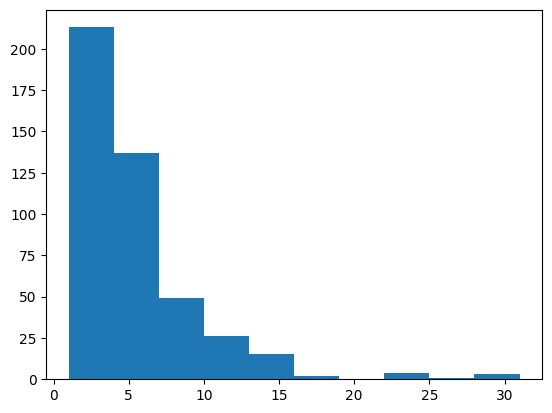

skew of volume= 2.731724
kurtosis of volume= 10.258547


In [ ]:
plt.hist(df['Volume'])
plt.show()
print('skew of volume= %f'%df['Volume'].skew())
print('kurtosis of volume= %f'%df['Volume'].kurtosis())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


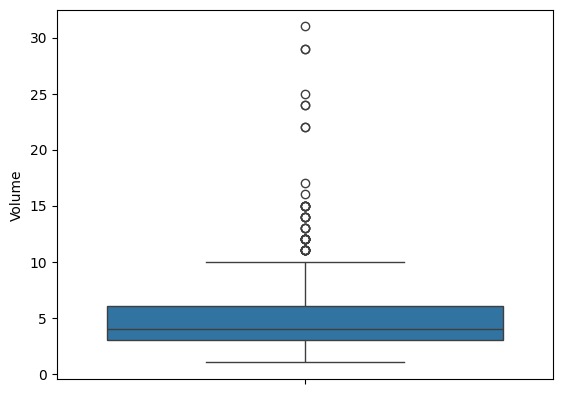

iqr of volume= 3.000000


In [ ]:
sns.boxplot(df['Volume'])
plt.show()
iqr_value=stats.iqr(df['Volume'])
print('iqr of volume= %f'%iqr_value)

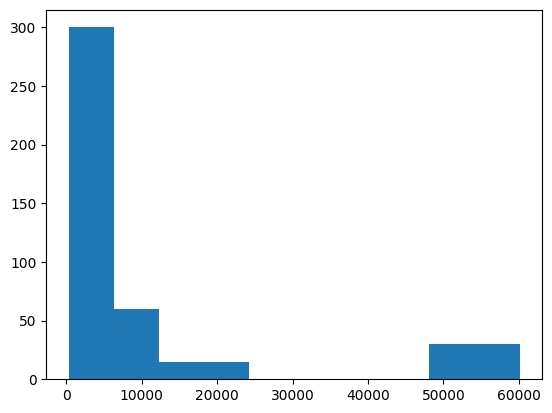

skew of Avg Price= 1.908873
kurtosis of Avg Price= 2.075655


In [ ]:
plt.hist(df['Avg Price'])
plt.show()
print('skew of Avg Price= %f'%df['Avg Price'].skew())
print('kurtosis of Avg Price= %f'%df['Avg Price'].kurtosis())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


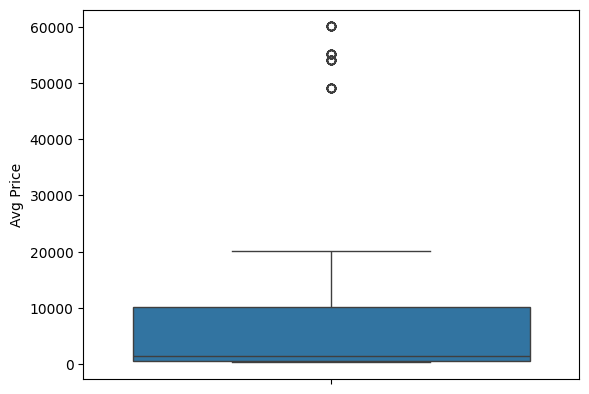

iqr of Avg Price = 9635.000000


In [ ]:
sns.boxplot(df['Avg Price'])
plt.show()
iqr_value=stats.iqr(df['Avg Price'])
print('iqr of Avg Price = %f'%iqr_value)

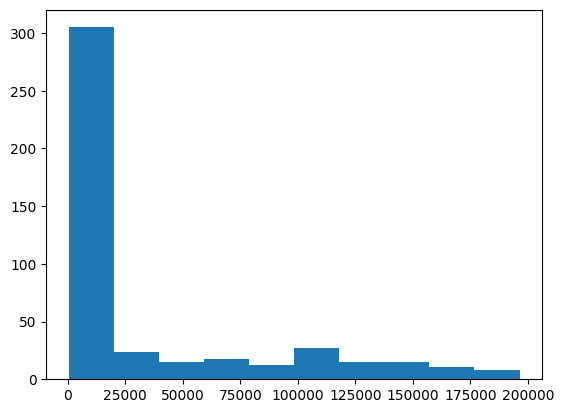

skew of total sales value= 1.534729
kurtosis of total sales value= 1.024916


In [ ]:
plt.hist(df['Total Sales Value'])
plt.show()
print('skew of total sales value= %f'%df['Total Sales Value'].skew())
print('kurtosis of total sales value= %f'%df['Total Sales Value'].kurtosis())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


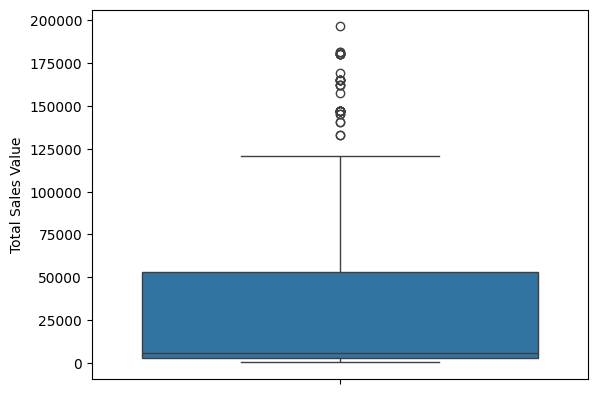

iqr of Total Sales Value = 50500.000000


In [ ]:
sns.boxplot(df['Total Sales Value'])
plt.show()
iqr_value=stats.iqr(df['Total Sales Value'])
print('iqr of Total Sales Value = %f'%iqr_value)

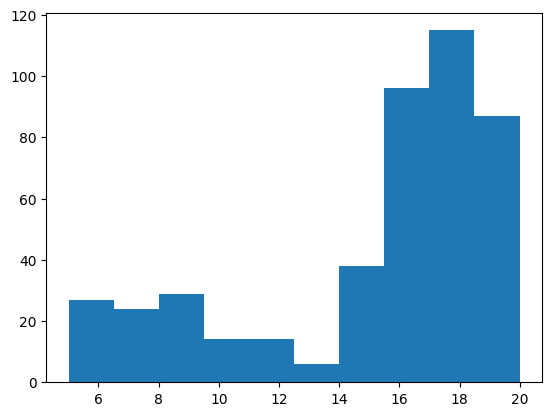

skew of Discount Rate= -1.062294
kurtosis of Discount Rate= -0.178541


In [ ]:
plt.hist(df['Discount Rate (%)'])
plt.show()
print('skew of Discount Rate= %f'%df['Discount Rate (%)'].skew())
print('kurtosis of Discount Rate= %f'%df['Discount Rate (%)'].kurtosis())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


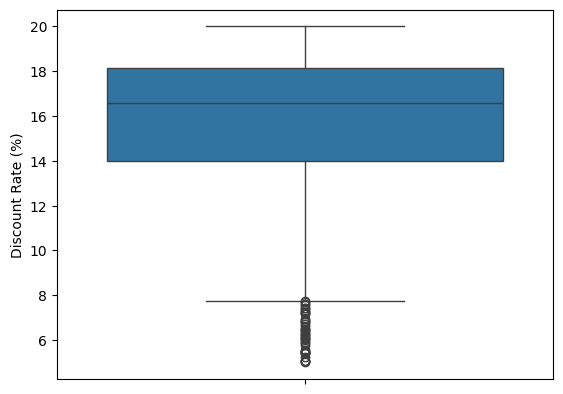

iqr of Discount Rate = 4.149656


In [ ]:
sns.boxplot(df['Discount Rate (%)'])
plt.show()
iqr_value=stats.iqr(df['Discount Rate (%)'])
print('iqr of Discount Rate = %f'%iqr_value)

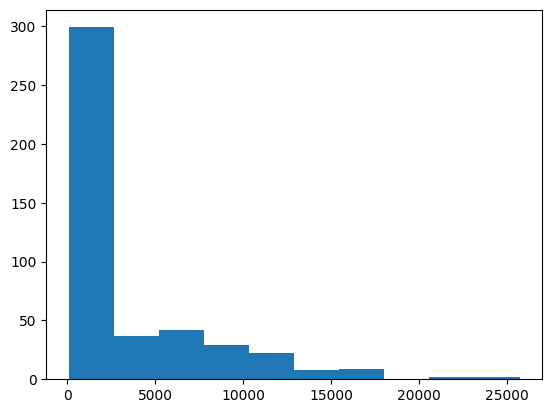

skew of Discount Amount= 1.913038
kurtosis of Discount Amount= 3.831186


In [ ]:
plt.hist(df['Discount Amount'])
plt.show()
print('skew of Discount Amount= %f'%df['Discount Amount'].skew())
print('kurtosis of Discount Amount= %f'%df['Discount Amount'].kurtosis())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


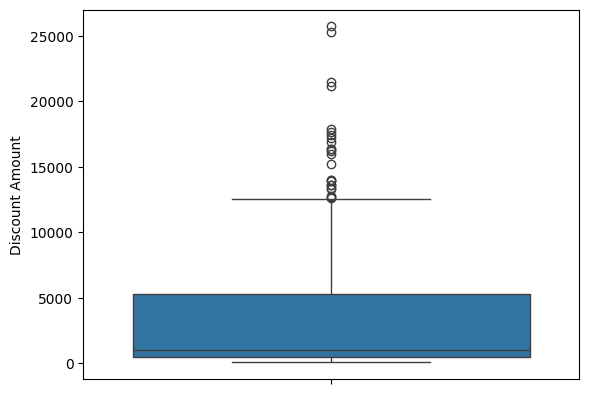

iqr of Discount Amount = 4856.036123


In [ ]:
sns.boxplot(df['Discount Amount'])
plt.show()
iqr_value=stats.iqr(df['Discount Amount'])
print('iqr of Discount Amount = %f'%iqr_value)


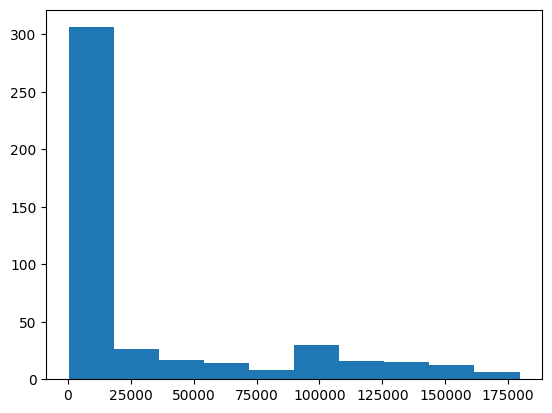

skew of Net Sales Value= 1.540822
kurtosis of Net Sales Value= 1.012468


In [ ]:
plt.hist(df['Net Sales Value'])
plt.show()
print('skew of Net Sales Value= %f'%df['Net Sales Value'].skew())
print('kurtosis of Net Sales Value= %f'%df['Net Sales Value'].kurtosis())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


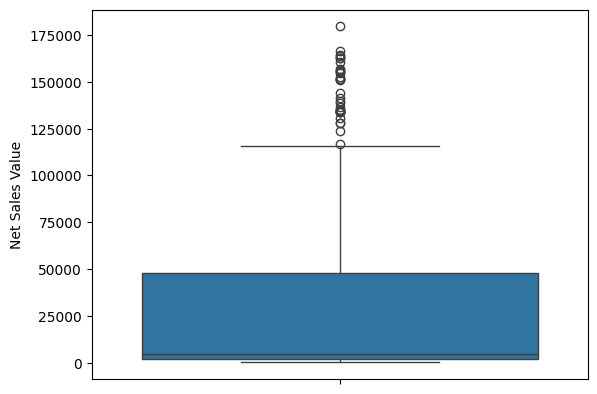

iqr of Net Sales Value = 45645.704206


In [ ]:
sns.boxplot(df['Net Sales Value'])
plt.show()
iqr_value=stats.iqr(df['Net Sales Value'])
print('iqr of Net Sales Value = %f'%iqr_value)


In [ ]:
#identifying categorical columns
cate_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", cate_cols)

Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [ ]:
#count of the categorical columns
for col in cate_cols:
  print(f"Value counts for {col}:")
  print(df[col].value_counts())
  print("\n")

Value counts for Date:
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64


Value counts for Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64


Value counts for SKU:
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64


Value counts for City:
City
C    450
Name: count, dtype: int64


Value counts for BU:
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64


V

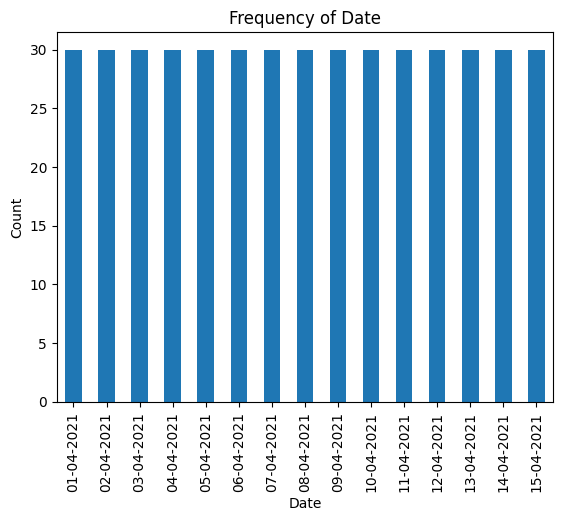

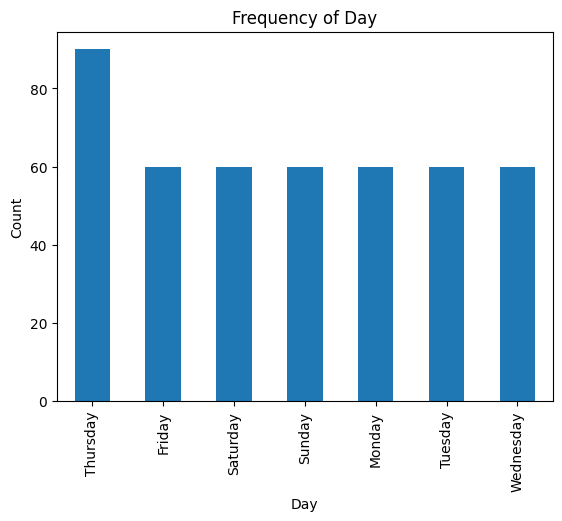

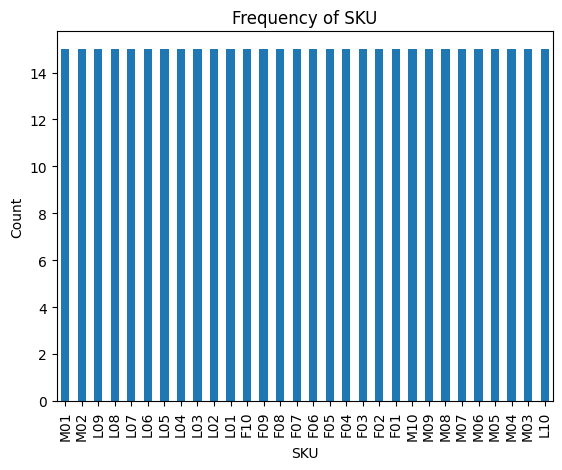

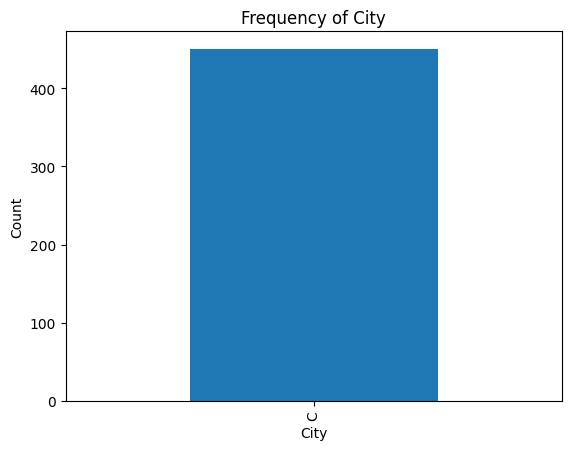

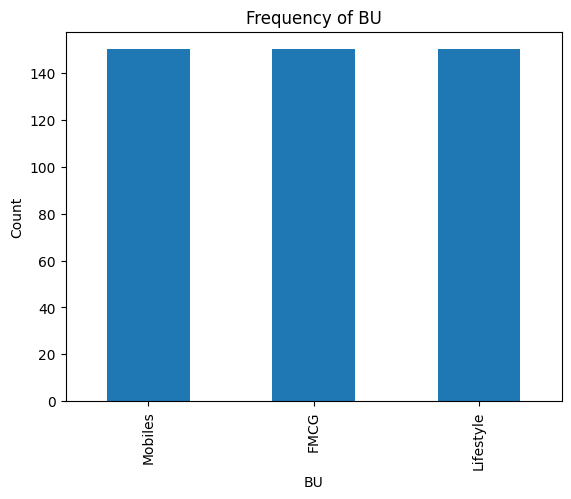

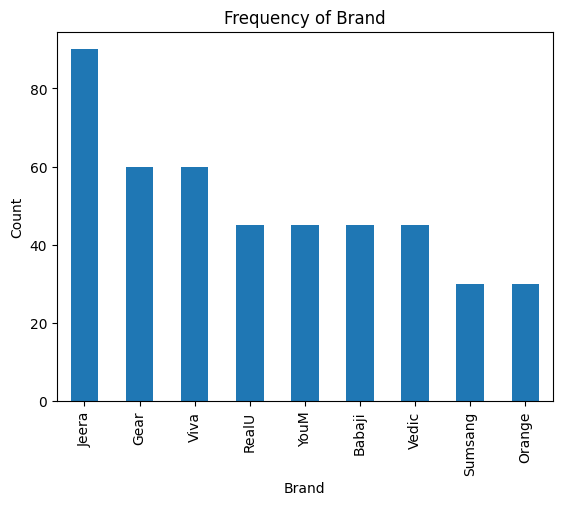

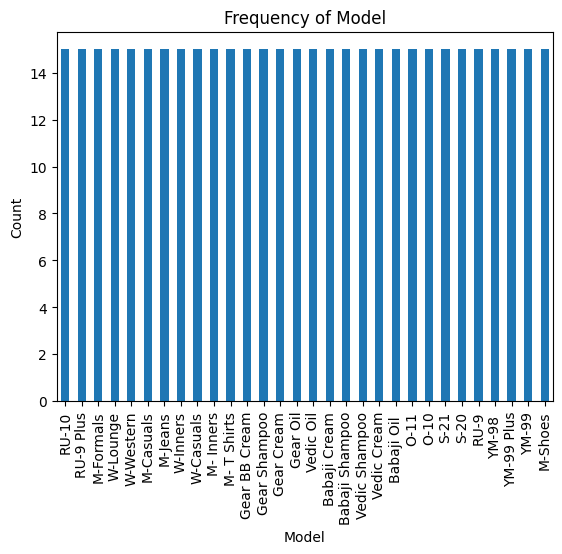

In [ ]:
#plotting counts of categories in barcharts
for col in cate_cols:
  df[col].value_counts().plot(kind='bar')
  plt.title(f'Frequency of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

In [ ]:
#standardizing each column using the z-score formula z=x-mu/sigma
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
  df[col + '_standardized'] = (df[col] - df[col].mean()) / df[col].std()

print(df)


           Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0 

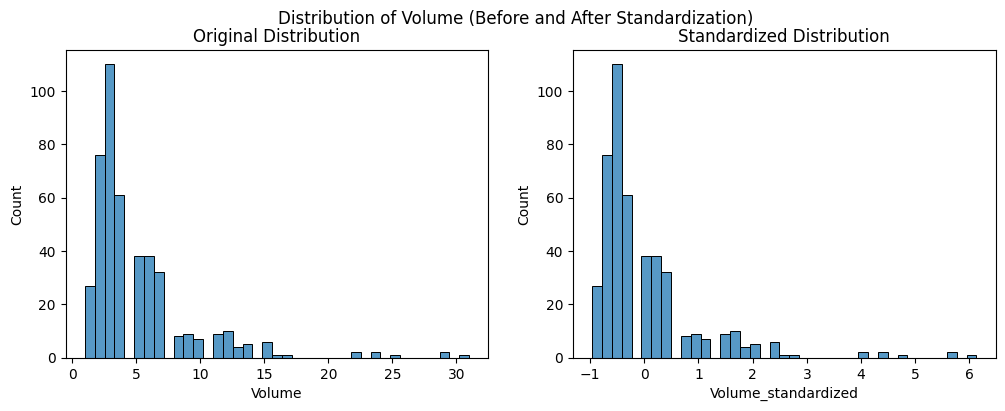

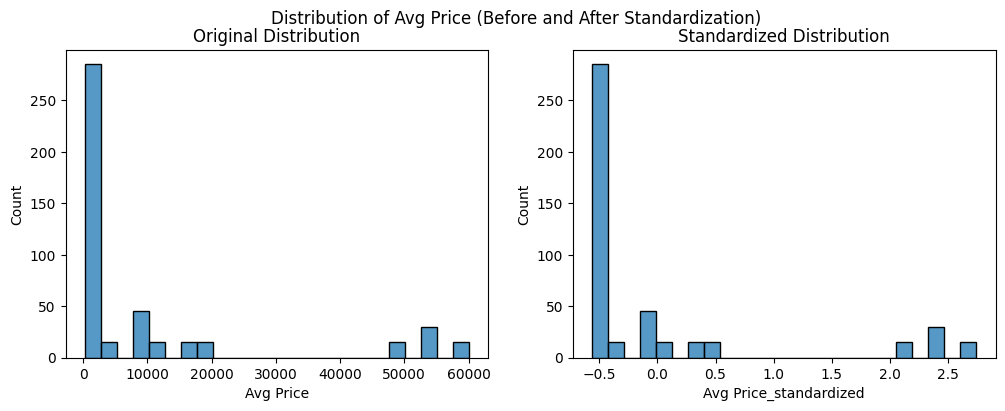

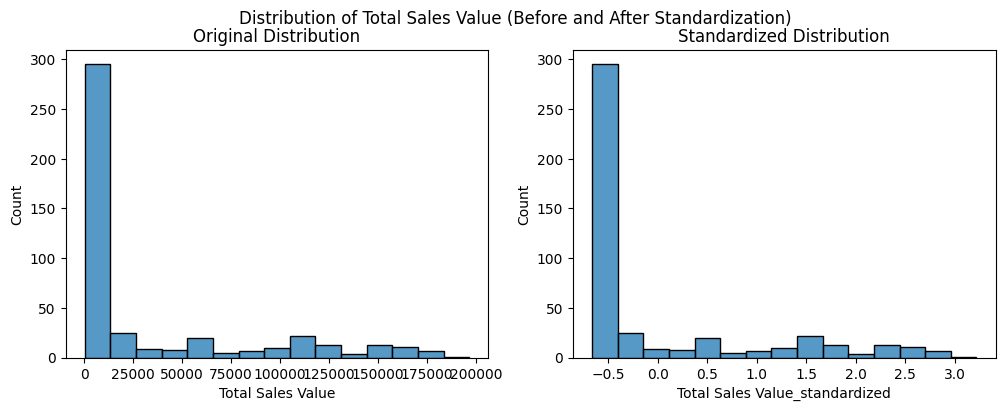

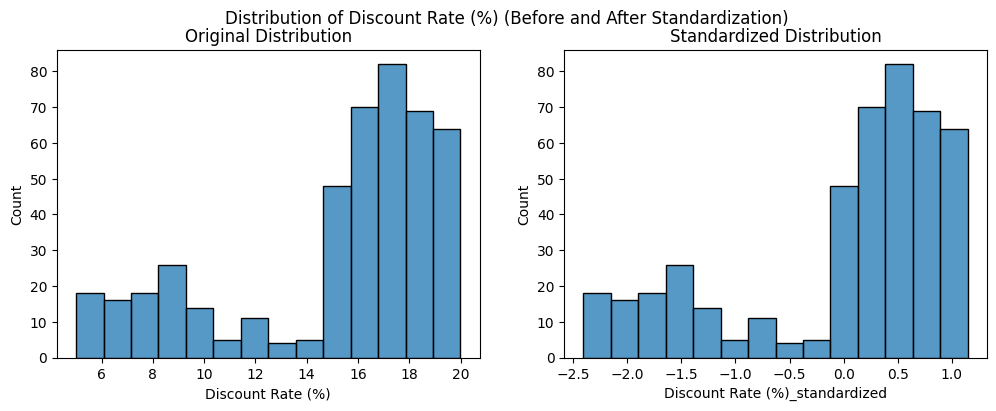

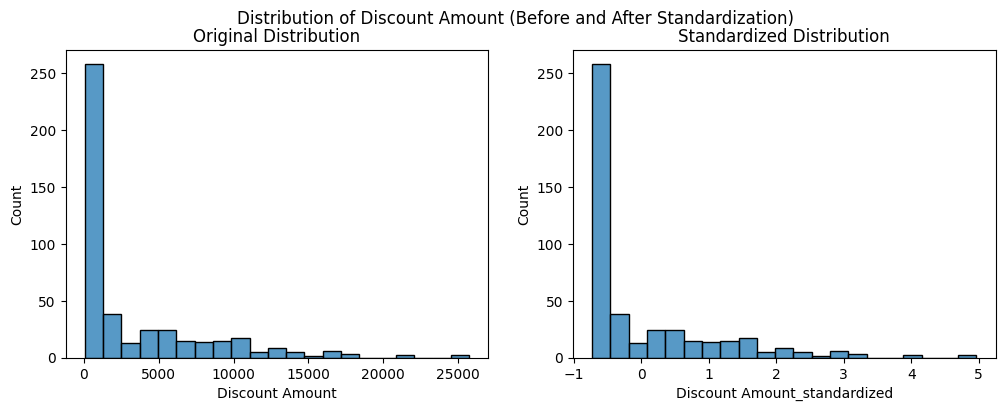

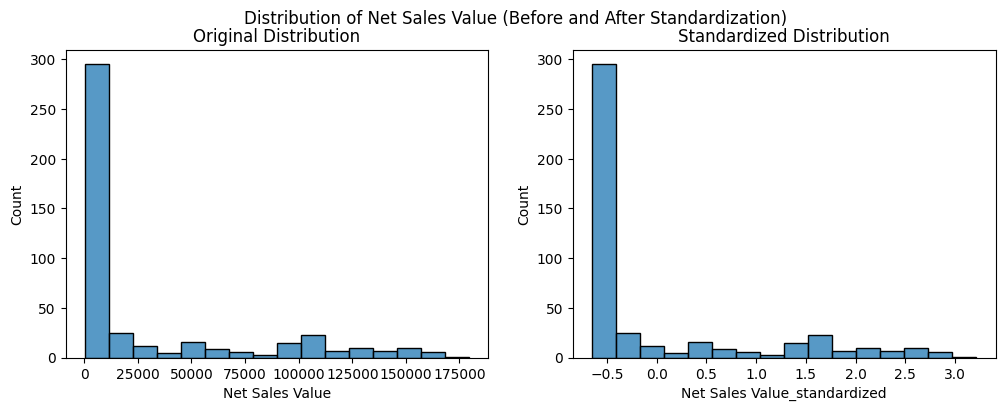

In [ ]:
#showing before and after standaradization of the columns using subplots
num_cols = df.select_dtypes(include=['number']).columns

for col in num_cols:
  if col.endswith('_standardized'):
    original_col = col[:-13]
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'Distribution of {original_col} (Before and After Standardization)')

    sns.histplot(df[original_col], ax=axes[0])
    axes[0].set_title('Original Distribution')

    sns.histplot(df[col], ax=axes[1])
    axes[1].set_title('Standardized Distribution')

    plt.show()


In [ ]:
#the categorical coulumns should be converted to numerical so it makes easier to apply machine learning algorithms,we use one hot coding to convert categorical to numerical
data_ml = pd.get_dummies(df, columns=cate_cols)
data_ml=data_ml.astype(int)
print(data_ml.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500                 11            21153   
1      10      10100             101000                 11            11676   
2       7      16100             112700                  9            10657   
3       6      20100             120600                  6             8364   
4       3       8100              24300                 17             4372   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0           160346                    2                       0   
1            89323                    1                       0   
2           102042                    0                       0   
3           112235                    0                       0   
4            19927                    0                       0   

   Total Sales Value_standardized  Discount Rate (%)_standardized  ...  \
0                               2               

In [ ]:
# Key Findings So Far

# 1. Data Distribution:
#   - Several numerical columns like 'Volume', 'Avg Price', 'Total Sales Value',
#     'Discount Rate (%)', 'Discount Amount', and 'Net Sales Value' show
#     skewness and kurtosis, indicating they are not normally distributed.
#   - Boxplots reveal the presence of potential outliers in some columns.
#   - Histograms provide visual representation of the data distribution.

# 2. Categorical Data Analysis:
#   - Identified categorical columns and analyzed their value counts.
#   - Visualized frequency distributions of these categories using bar charts.

# 3. Standardization:
#   - Applied z-score standardization to numerical columns, transforming them
#     to have zero mean and unit variance.
#   - Compared the original and standardized distributions visually, demonstrating
#     the effect of standardization.

# 4. Data Preparation for Machine Learning:
#   - Converted categorical columns to numerical using one-hot encoding.
#   - This allows for easier application of machine learning algorithms on the
#     dataset.

# 5. Further Steps:
#   - Investigate outliers and consider handling them appropriately (removal,
#     transformation).
#   - Perform correlation analysis to understand relationships between features.
#   - Explore different machine learning algorithms and model selection
#     techniques to build predictive models.
#   - Consider feature engineering to create new features that may be more
#     relevant for the task at hand.


# Note: These findings are based on the initial exploratory data analysis (EDA)
# and data preparation steps. More in-depth analysis and modeling are needed to
# gain a complete understanding of the dataset and extract meaningful insights.
